# 1. Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

d:\Descargas\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


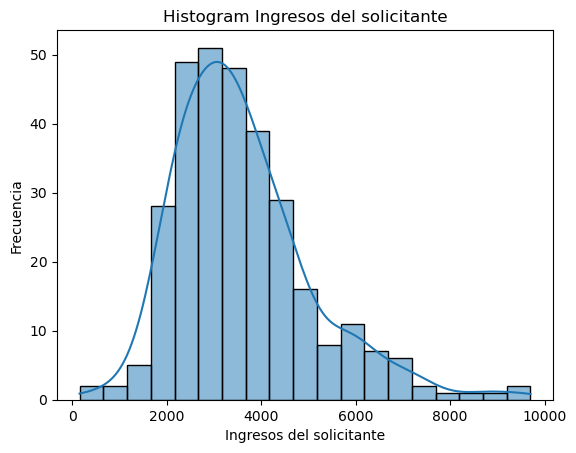

In [9]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Histogram Ingresos del solicitante')
plt.xlabel('Ingresos del solicitante')
plt.ylabel('Frecuencia')
plt.show()

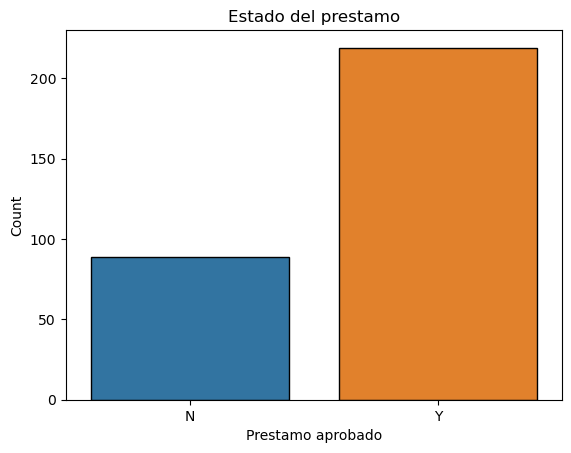

In [10]:
sns.countplot(x= 'Loan_Status', data = df, edgecolor='black')
plt.title('Estado del prestamo')
plt.xlabel('Prestamo aprobado')
plt.ylabel('Count')
plt.show()

In [11]:
monto_promedio_del_préstamo_por_educación = df.groupby('Education')['LoanAmount'].mean().reset_index()
monto_promedio_del_préstamo_por_educación

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


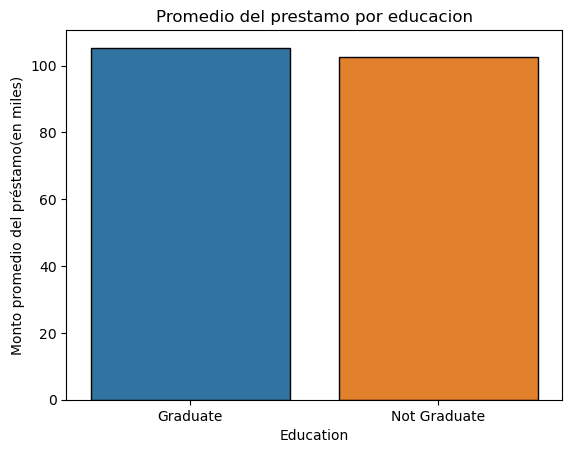

In [12]:
sns.barplot(x='Education', y ='LoanAmount', data= monto_promedio_del_préstamo_por_educación, edgecolor='black')
plt.title('Promedio del prestamo por educacion')
plt.xlabel('Education')
plt.ylabel('Monto promedio del préstamo(en miles)')
plt.show()


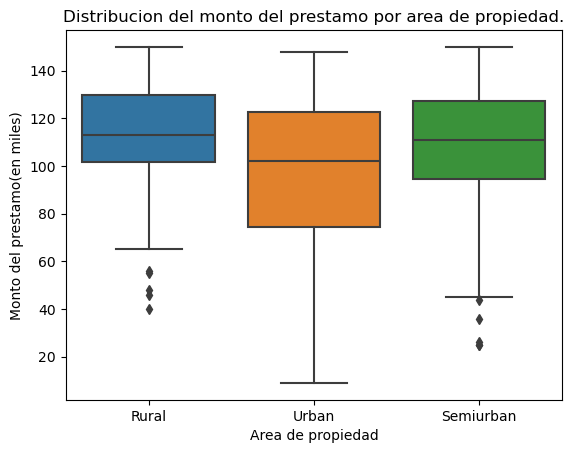

In [13]:
sns.boxplot(x='Property_Area', y = 'LoanAmount', data = df)
plt.title('Distribucion del monto del prestamo por area de propiedad.')
plt.xlabel('Area de propiedad')
plt.ylabel('Monto del prestamo(en miles)')
plt.show()

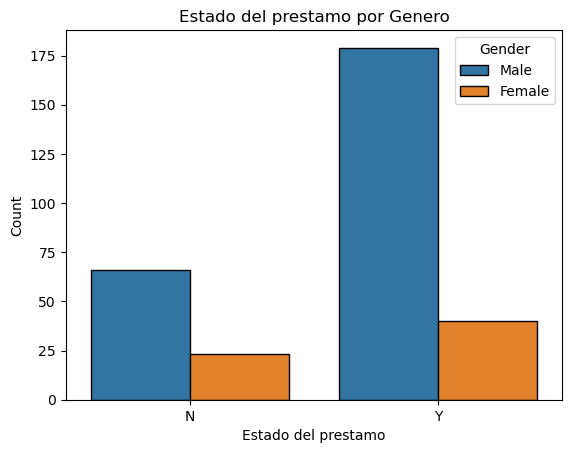

In [14]:
sns.countplot(x= 'Loan_Status', hue='Gender', data = df, edgecolor='black')
plt.title('Estado del prestamo por Genero')
plt.xlabel('Estado del prestamo')
plt.ylabel('Count')
plt.show()

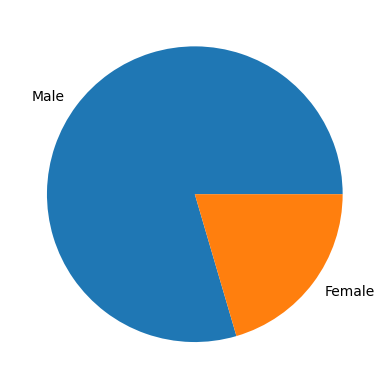

In [15]:
df['Gender'].value_counts().plot(kind='pie') # Podemos ver que en el dataset hay mas hombres que mujeres.
plt.ylabel('')
plt.show()

In [16]:
estodo_del_prestamo_by_married = df.groupby('Married')['Loan_Status'].value_counts().unstack()

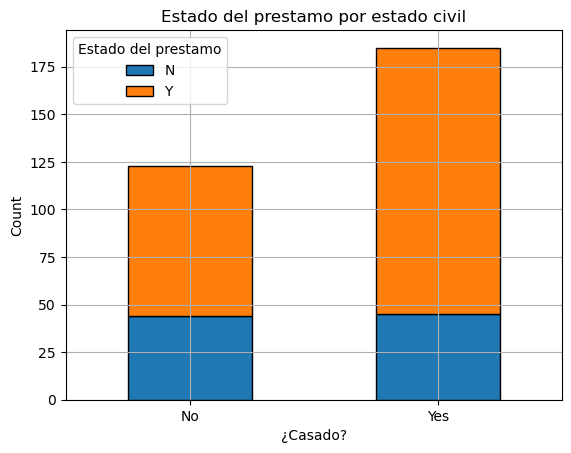

In [17]:
estodo_del_prestamo_by_married.plot(kind='bar',stacked=True, edgecolor ='black')
plt.title('Estado del prestamo por estado civil')
plt.xlabel('¿Casado?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Estado del prestamo')
plt.grid()
plt.show()

In [18]:
df['Married'].value_counts()

Married
Yes    185
No     123
Name: count, dtype: int64

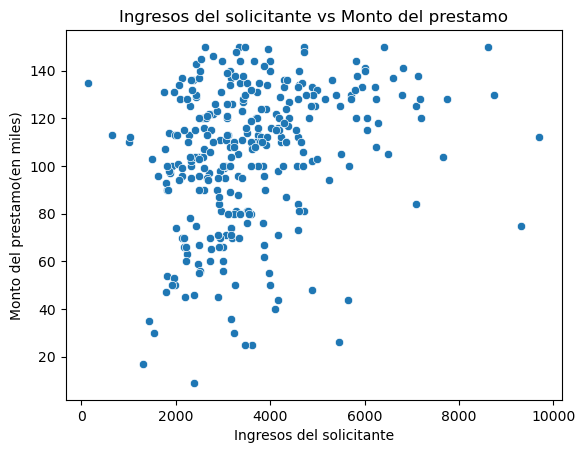

In [19]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Ingresos del solicitante vs Monto del prestamo')
plt.xlabel('Ingresos del solicitante')
plt.ylabel('Monto del prestamo(en miles)')
plt.show()

In [20]:
columnas_numericas = df.select_dtypes(include=['int64','float64'])

In [21]:
columnas_numericas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [22]:
correlation_matrix = columnas_numericas.corr()

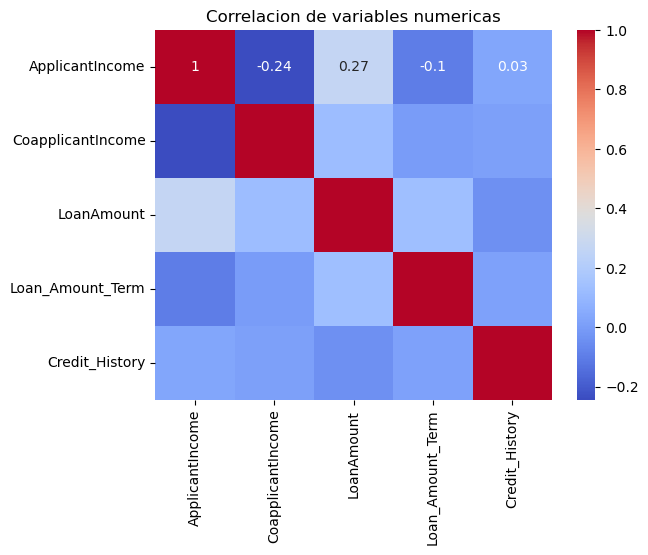

In [23]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Correlacion de variables numericas')
plt.show()

In [24]:
plazo_del_prestamo_en_meses_by_employed = df.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()

In [25]:
plazo_del_prestamo_en_meses_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


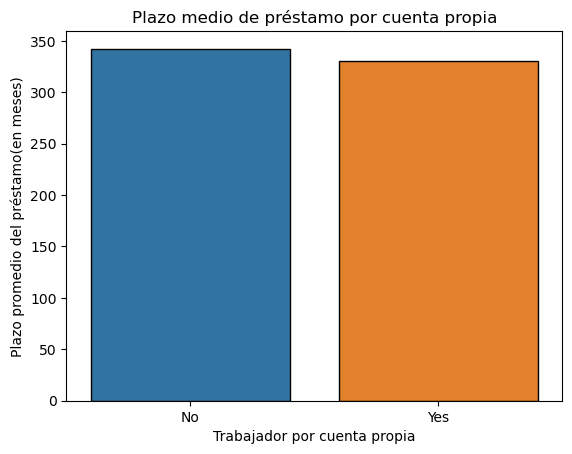

In [26]:
sns.barplot(x='Self_Employed', y= 'Loan_Amount_Term', data= plazo_del_prestamo_en_meses_by_employed, edgecolor = 'black')
plt.title('Plazo medio de préstamo por cuenta propia')
plt.xlabel('Trabajador por cuenta propia')
plt.ylabel('Plazo promedio del préstamo(en meses)')
plt.show()

# 2. Feature Engineering


In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [28]:
X = df[['Married','ApplicantIncome', 'Education', 'LoanAmount', 'Credit_History']]

In [29]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [30]:
y = df[['Loan_Status']]

In [31]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [32]:
y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_15772\3706250552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])


In [33]:
y # Yes es 1 No es 0

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [34]:
X['Married'] = labelencoder.fit_transform(X['Married']) # No es 0 Yes es 1

C:\Users\pauli\AppData\Local\Temp\ipykernel_15772\1770486868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = labelencoder.fit_transform(X['Married']) # No es 0 Yes es 1


In [35]:
X['Education'] = labelencoder.fit_transform(X['Education'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_15772\3386065747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education'] = labelencoder.fit_transform(X['Education'])


In [36]:
X # Graduate es 0 Not Graduate es 1

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X = scaler.fit_transform(X)
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [39]:
import joblib
joblib.dump(scaler,'Scaler.pkl')

['Scaler.pkl']

# 3. Training Machine Learning Models

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
def modelperformance(predictions):
    print('Accuracy Score on model is {}'.format(accuracy_score(y_test,predictions)))


In [43]:
from sklearn.model_selection import GridSearchCV

### LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [45]:
log_model.fit(X_train, y_train)

d:\Descargas\ANACONDA\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
log_predictions = log_model.predict(X_test)

In [47]:
modelperformance(log_predictions)

Accuracy Score on model is 0.8494623655913979


### KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3,5,6,7,8],
              'weights': ['uniform','distance']}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [49]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [50]:
knpredictions = gridkn.predict(X_test)

In [51]:
modelperformance(knpredictions)

Accuracy Score on model is 0.7956989247311828


### Support Vector Machines

In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC()
param_grid_svc = {'C': [0.04,0.01,0.1,0.5], 'kernel':['linear','rbf','poly']}

In [54]:
grid_svc = GridSearchCV(svm, param_grid_svc)

In [55]:
grid_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.04, 0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [56]:
grid_svc.best_params_

{'C': 0.04, 'kernel': 'linear'}

In [57]:
pred_svc = grid_svc.predict(X_test)

In [58]:
modelperformance(pred_svc)

Accuracy Score on model is 0.8602150537634409


In [59]:
joblib.dump(grid_svc, 'model.pkl')

['model.pkl']